In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.style.use("dark_background")


In [2]:

file_path = 'NÃO ALUNOS ACESSO.csv'
data = pd.read_csv(file_path)


In [3]:
# Exibir as primeiras linhas dos dados
print(data.head())

# Verificar os valores únicos na coluna 'ORIGIN'
print(data['ORIGIN'].unique())


      TS_TIME              EMAIL_UNIFICADO   ORIGIN
0  2024-08-14  shirlaniacosta595@gmail.com  sign_in
1  2024-08-14     silva.l.ua.lel@gmail.com  sign_in
2  2024-08-14    amandasara.2415@gmail.com  sign_up
3  2024-08-14        larisse1991@gmail.com  sign_in
4  2024-08-14     duque.gaita@yahoo.com.br  sign_up
['sign_in' 'sign_up']


In [4]:
# Contagem dos valores na coluna 'ORIGIN'
origin_counts = data['ORIGIN'].value_counts()

# Exibir as contagens
print(origin_counts)


sign_in    258725
sign_up    102100
Name: ORIGIN, dtype: int64


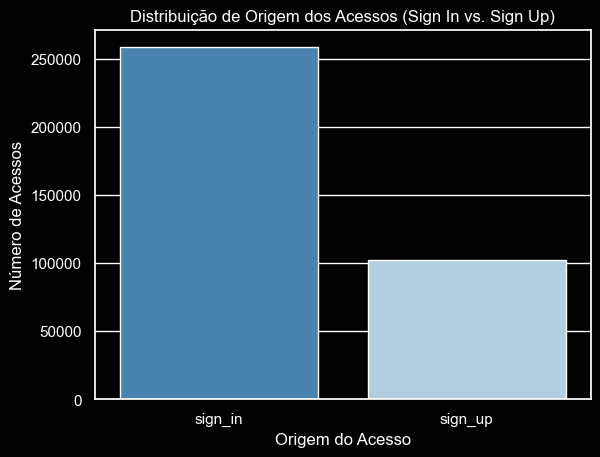

In [5]:
# Gráfico de barras
sns.barplot(x=origin_counts.index, y=origin_counts.values, palette="Blues_r")

# Adicionar títulos e rótulos
plt.title("Distribuição de Origem dos Acessos (Sign In vs. Sign Up)")
plt.xlabel("Origem do Acesso")
plt.ylabel("Número de Acessos")
plt.show()


In [6]:
# Calcular a proporção de cada origem
origin_percentages = origin_counts / origin_counts.sum() * 100

# Exibir as porcentagens
print(origin_percentages)


sign_in    71.703734
sign_up    28.296266
Name: ORIGIN, dtype: float64


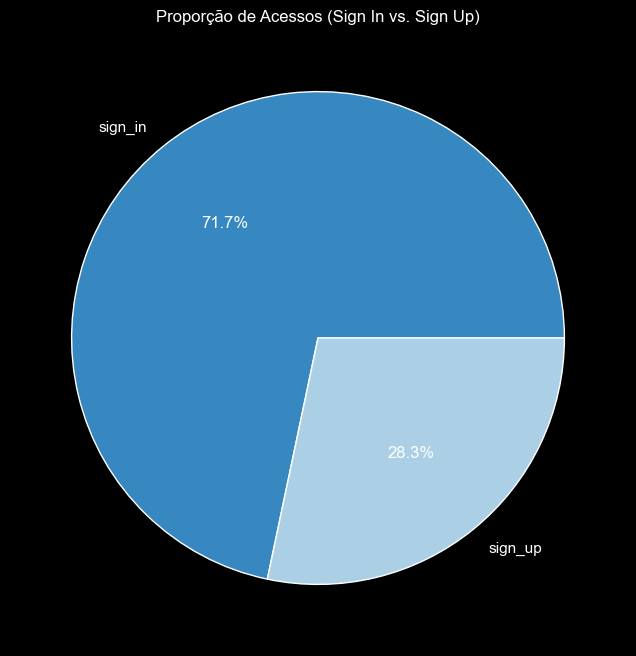

In [7]:
# Gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(origin_percentages, labels=origin_percentages.index, autopct='%1.1f%%', colors=sns.color_palette("Blues_r", len(origin_percentages)))

# Título do gráfico
plt.title("Proporção de Acessos (Sign In vs. Sign Up)")
plt.show()


In [8]:
first_last_access = data.groupby('EMAIL_UNIFICADO')['TS_TIME'].agg(['min', 'max']).reset_index()
first_last_access.columns = ['EMAIL_UNIFICADO', 'first_access', 'last_access']


In [9]:
first_last_access['returned'] = first_last_access['first_access'] != first_last_access['last_access']


In [10]:
retention_rate = first_last_access['returned'].mean() * 100
print(f"Taxa de Retenção: {retention_rate:.2f}%")


Taxa de Retenção: 21.85%


In [14]:
returned_counts = first_last_access['returned'].value_counts()

# Exibir os resultados
print("Usuários que retornaram:", returned_counts[True])
print("Usuários que não retornaram:", returned_counts[False])

Usuários que retornaram: 40981
Usuários que não retornaram: 146605


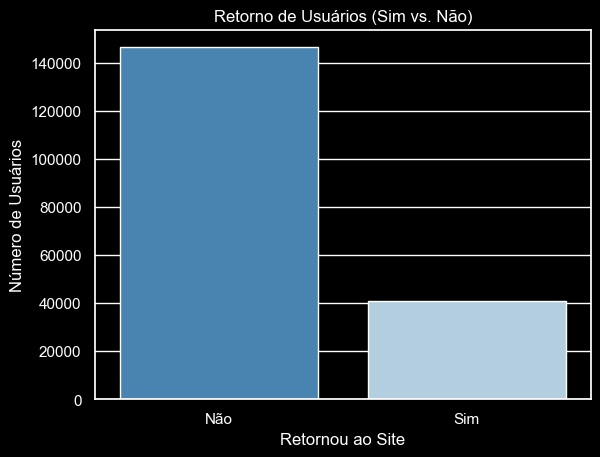

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.style.use("dark_background")

sns.countplot(x='returned', data=first_last_access, palette="Blues_r")
plt.title("Retorno de Usuários (Sim vs. Não)")
plt.xlabel("Retornou ao Site")
plt.ylabel("Número de Usuários")
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()


In [16]:
first_last_access = data.groupby('EMAIL_UNIFICADO')['TS_TIME'].agg(['min', 'max']).reset_index()
first_last_access.columns = ['EMAIL_UNIFICADO', 'first_access', 'last_access']


In [17]:
first_last_access['life_span'] = (first_last_access['last_access'] - first_last_access['first_access']).dt.days


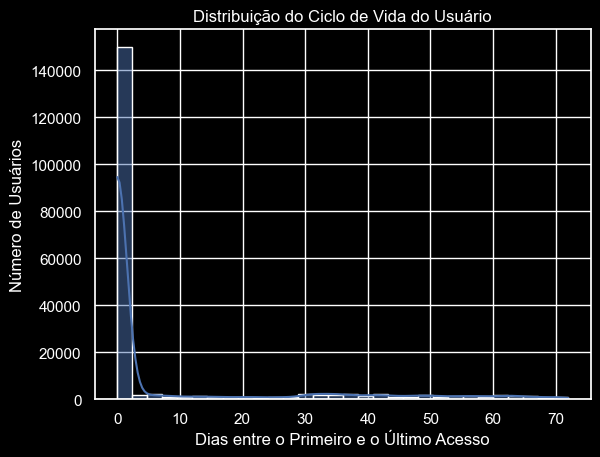

In [18]:

sns.histplot(first_last_access['life_span'], bins=30, kde=True, palette="Blues_r")
plt.title("Distribuição do Ciclo de Vida do Usuário")
plt.xlabel("Dias entre o Primeiro e o Último Acesso")
plt.ylabel("Número de Usuários")
plt.show()


In [19]:
first_last_access['life_segment'] = pd.cut(first_last_access['life_span'], bins=[0, 7, 30, max(first_last_access['life_span'])], labels=['Curto Prazo', 'Médio Prazo', 'Longo Prazo'])
life_segment_counts = first_last_access['life_segment'].value_counts()
print(life_segment_counts)


Longo Prazo    24835
Médio Prazo     9362
Curto Prazo     6784
Name: life_segment, dtype: int64


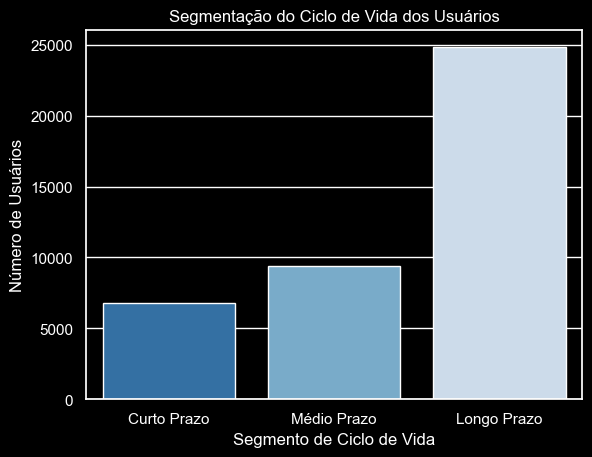

In [20]:
sns.barplot(x=life_segment_counts.index, y=life_segment_counts.values, palette="Blues_r")
plt.title("Segmentação do Ciclo de Vida dos Usuários")
plt.xlabel("Segmento de Ciclo de Vida")
plt.ylabel("Número de Usuários")
plt.show()
